<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/2%EC%A3%BC%EC%B0%A8/%ED%86%B5%EC%8B%A0%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EC%9D%B4%ED%83%88_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통신사 고객 이탈 예측

[문제2](https://www.kaggle.com/c/2021-ml-midterm-p2)



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ml-midterm-p2

  0% 0.00/691k [00:00<?, ?B/s]
100% 691k/691k [00:00<00:00, 33.6MB/s]
  0% 0.00/167k [00:00<?, ?B/s]
100% 167k/167k [00:00<00:00, 51.5MB/s]
  0% 0.00/7.99k [00:00<?, ?B/s]
100% 7.99k/7.99k [00:00<00:00, 9.03MB/s]


In [76]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submit.csv')

In [5]:
train.head()

,index,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4788 non-null   int64  
 1   Unnamed: 0        4788 non-null   int64  
 2   customerID        4788 non-null   object 
 3   gender            4788 non-null   object 
 4   SeniorCitizen     4788 non-null   int64  
 5   Partner           4788 non-null   object 
 6   Dependents        4788 non-null   object 
 7   tenure            4788 non-null   int64  
 8   PhoneService      4788 non-null   object 
 9   MultipleLines     4788 non-null   object 
 10  InternetService   4788 non-null   object 
 11  OnlineSecurity    4788 non-null   object 
 12  OnlineBackup      4788 non-null   object 
 13  DeviceProtection  4788 non-null   object 
 14  TechSupport       4788 non-null   object 
 15  StreamingTV       4788 non-null   object 
 16  StreamingMovies   4788 non-null   object 


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1198 non-null   int64  
 1   Unnamed: 0        1198 non-null   int64  
 2   customerID        1198 non-null   object 
 3   gender            1198 non-null   object 
 4   SeniorCitizen     1198 non-null   int64  
 5   Partner           1198 non-null   object 
 6   Dependents        1198 non-null   object 
 7   tenure            1198 non-null   int64  
 8   PhoneService      1198 non-null   object 
 9   MultipleLines     1198 non-null   object 
 10  InternetService   1198 non-null   object 
 11  OnlineSecurity    1198 non-null   object 
 12  OnlineBackup      1198 non-null   object 
 13  DeviceProtection  1198 non-null   object 
 14  TechSupport       1198 non-null   object 
 15  StreamingTV       1198 non-null   object 
 16  StreamingMovies   1198 non-null   object 


In [72]:
train['TotalCharges'].value_counts()

           10
20.2        8
19.75       8
19.9        6
45.3        5
           ..
95.1        1
7962.2      1
5728.55     1
1509.9      1
2514.5      1
Name: TotalCharges, Length: 4544, dtype: int64

뭐야 저 빈칸이 10개나 있음. 어쩐지 모델이 안돌아가더라!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1

In [77]:
mad=train[train['TotalCharges']==' '].index
mad

Int64Index([280, 512, 2213, 2470, 2617, 3457, 4297, 4303, 4555, 4759], dtype='int64')

In [78]:
train=train.drop(mad,axis=0)

In [80]:
train=train.astype({'TotalCharges':'float'})

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778 entries, 0 to 4787
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             4778 non-null   int64  
 1   Unnamed: 0        4778 non-null   int64  
 2   customerID        4778 non-null   object 
 3   gender            4778 non-null   object 
 4   SeniorCitizen     4778 non-null   int64  
 5   Partner           4778 non-null   object 
 6   Dependents        4778 non-null   object 
 7   tenure            4778 non-null   int64  
 8   PhoneService      4778 non-null   object 
 9   MultipleLines     4778 non-null   object 
 10  InternetService   4778 non-null   object 
 11  OnlineSecurity    4778 non-null   object 
 12  OnlineBackup      4778 non-null   object 
 13  DeviceProtection  4778 non-null   object 
 14  TechSupport       4778 non-null   object 
 15  StreamingTV       4778 non-null   object 
 16  StreamingMovies   4778 non-null   object 


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1198 non-null   int64  
 1   Unnamed: 0        1198 non-null   int64  
 2   customerID        1198 non-null   object 
 3   gender            1198 non-null   object 
 4   SeniorCitizen     1198 non-null   int64  
 5   Partner           1198 non-null   object 
 6   Dependents        1198 non-null   object 
 7   tenure            1198 non-null   int64  
 8   PhoneService      1198 non-null   object 
 9   MultipleLines     1198 non-null   object 
 10  InternetService   1198 non-null   object 
 11  OnlineSecurity    1198 non-null   object 
 12  OnlineBackup      1198 non-null   object 
 13  DeviceProtection  1198 non-null   object 
 14  TechSupport       1198 non-null   object 
 15  StreamingTV       1198 non-null   object 
 16  StreamingMovies   1198 non-null   object 


In [83]:
train=train.drop(['index','Unnamed: 0','customerID'],axis=1)
test=test.drop(['index','Unnamed: 0','customerID'],axis=1)

# 데이터 전처리

- 범주형 변수 라벨인코더 처리
- target 값, 0,1로 정수 처리


In [21]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
col=train.columns

for i in col:
  print(train[i].value_counts())
  print("\n")
  

Male      2459
Female    2319
Name: gender, dtype: int64


0    4000
1     778
Name: SeniorCitizen, dtype: int64


No     2466
Yes    2312
Name: Partner, dtype: int64


No     3334
Yes    1444
Name: Dependents, dtype: int64


1     400
72    247
2     166
3     133
4     125
     ... 
28     40
59     39
44     36
39     34
36     32
Name: tenure, Length: 72, dtype: int64


Yes    4307
No      471
Name: PhoneService, dtype: int64


No                  2268
Yes                 2039
No phone service     471
Name: MultipleLines, dtype: int64


Fiber optic    2114
DSL            1618
No             1046
Name: InternetService, dtype: int64


No                     2380
Yes                    1352
No internet service    1046
Name: OnlineSecurity, dtype: int64


No                     2085
Yes                    1647
No internet service    1046
Name: OnlineBackup, dtype: int64


No                     2071
Yes                    1661
No internet service    1046
Name: DeviceProtection, dtype: 

In [85]:
col=test.columns

for i in col:
  print(test[i].value_counts())
  print("\n")

Female    613
Male      585
Name: gender, dtype: int64


0    1010
1     188
Name: SeniorCitizen, dtype: int64


No     614
Yes    584
Name: Partner, dtype: int64


No     861
Yes    337
Name: Dependents, dtype: int64


1     110
72     61
3      36
71     34
4      29
     ... 
62      7
40      6
30      6
38      5
53      3
Name: tenure, Length: 72, dtype: int64


Yes    1081
No      117
Name: PhoneService, dtype: int64


No                  575
Yes                 506
No phone service    117
Name: MultipleLines, dtype: int64


Fiber optic    513
DSL            446
No             239
Name: InternetService, dtype: int64


No                     602
Yes                    357
No internet service    239
Name: OnlineSecurity, dtype: int64


No                     519
Yes                    440
No internet service    239
Name: OnlineBackup, dtype: int64


No                     568
Yes                    391
No internet service    239
Name: DeviceProtection, dtype: int64


No           

- 범주형 변수 :'gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport' ,'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn'

- 연속형변수 : 'tenure', 'MonthlyCharges', 'TotalCharges', 

In [86]:
from sklearn.preprocessing import LabelEncoder

col=['gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 
            'DeviceProtection', 'TechSupport' ,'StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in col:
  le=LabelEncoder()
  train[i]=le.fit_transform(train[i].values)
  test[i]=le.transform(test[i].values)

## EDA

In [33]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

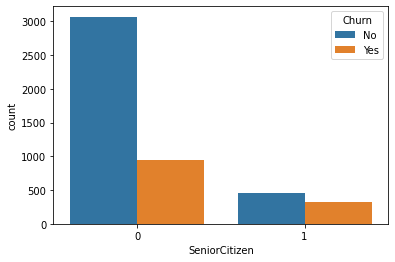

In [45]:
sns.countplot(x='SeniorCitizen',data=train,hue='Churn')

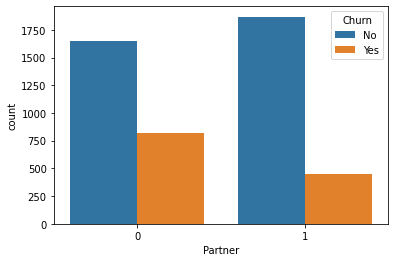

In [44]:
sns.countplot(x='Partner',data=train,hue='Churn')

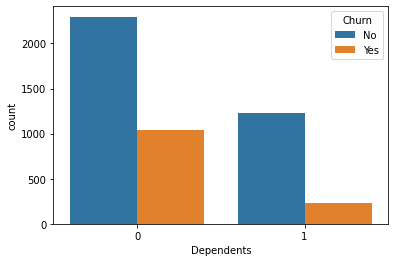

In [43]:
sns.countplot(x='Dependents',data=train,hue='Churn')

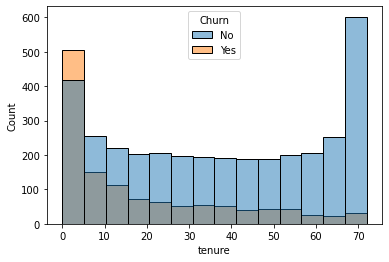

In [42]:
sns.histplot(train,x='tenure',hue='Churn')

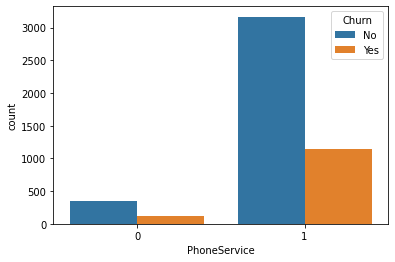

In [47]:
sns.countplot(x='PhoneService',data=train,hue='Churn')

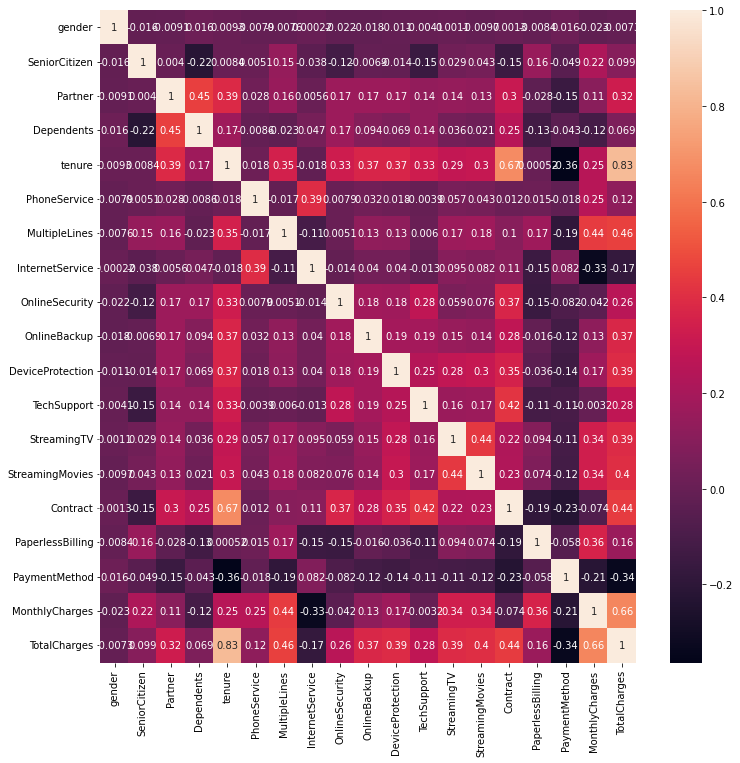

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

In [56]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
X_train=train.drop('Churn',axis=1)
y_train=train['Churn']
X_test=test

In [124]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_clf=RandomForestClassifier()
xgb_clf=XGBClassifier()

rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
rf_sample=sample.copy()
rf_sample['Churn']=rf_pred

xgb_clf.fit(X_train,y_train)
xgb_pred=xgb_clf.predict(X_test)
xgb_sample=sample.copy()
xgb_sample['Churn']=xgb_pred


In [125]:
def cvt_string(data):
  if data.lower()== 'yes' :
    return 1
  elif data.lower() == 'no':
    return 0

In [126]:
rf_sample['Churn'] = rf_sample['Churn'].apply(cvt_string)

In [127]:
xgb_sample['Churn'] = xgb_sample['Churn'].apply(cvt_string)

In [128]:
rf_sample.to_csv("rf.csv", mode='w', header=True, index= False)

In [129]:
xgb_sample.to_csv("xgb.csv", mode='w', header=True, index= False)

## 하이퍼파라미터 튜닝

In [105]:
data=train.drop('Churn',axis=1)
target=train['Churn']

In [106]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=0)



In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3344, 19)
(1434, 19)
(3344,)
(1434,)


### 랜덤포레스트 하이퍼파라미터 튜닝

In [97]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,300,500],
    'max_depth':[4,6,8,10],
    'min_samples_leaf':[8,12,15],
    'min_samples_split':[5,8,12,16]
}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}
최고 예측 정확도 :  0.8053240051203194


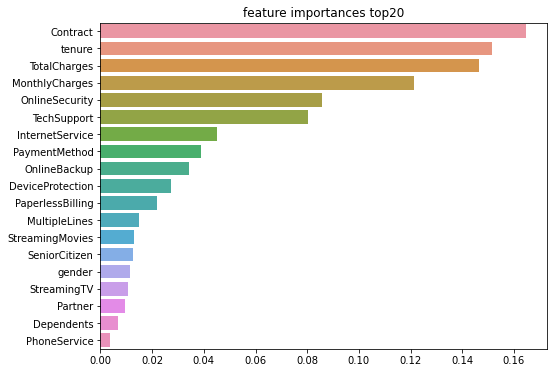

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances top20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [110]:
X_train=train.drop('Churn',axis=1)
y_train=train['Churn']
X_test=test

In [111]:
from sklearn.metrics import accuracy_score

rf_clf1=RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split= 5, n_estimators=100,random_state=0)

rf_clf1.fit(X_train,y_train)
rf_pred1=rf_clf1.predict(X_test)
rf_sample1=sample.copy()
rf_sample1['Churn']=rf_pred1


In [130]:
rf_sample1['Churn'] = rf_sample1['Churn'].apply(cvt_string)

In [131]:
rf_sample1.to_csv("rf1.csv", mode='w', header=True, index= False)

### XGBoost 하이퍼 파라미터 튜닝



In [113]:
data=train.drop('Churn',axis=1)
target=train['Churn']

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=0)


In [117]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,300,500],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[4,6,8,10],
    'min_child_weight':[3,5,8],
    'subsample':[0.2,0.5,1],
    'colsample_bytree':[0.3,0.5,0.8,1]
}

xgb_clf=XGBClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(xgb_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적 하이퍼 파라미터:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.2}
최고 예측 정확도 :  0.8119028642122409


In [119]:
xgb_clf1=XGBClassifier(colsample_bytree= 1, learning_rate= 0.05, max_depth= 4,
                       min_child_weight= 5, n_estimators= 100, subsample= 0.2)
xgb_clf1.fit(X_train,y_train)
xgb_pred1=xgb_clf1.predict(X_test)
print(accuracy_score(y_test,xgb_pred1))


0.806136680613668


In [120]:
X_train=train.drop('Churn',axis=1)
y_train=train['Churn']
X_test=test

In [122]:
from sklearn.metrics import accuracy_score

xgb_clf1=XGBClassifier(colsample_bytree= 1, learning_rate= 0.05, max_depth= 4,
                       min_child_weight= 5, n_estimators= 100, subsample= 0.2)
xgb_clf1.fit(X_train,y_train)
xgb_pred1=xgb_clf1.predict(X_test)
xgb_sample1=sample.copy()
xgb_sample1['Churn']=xgb_pred1


In [132]:
xgb_sample1['Churn'] = xgb_sample1['Churn'].apply(cvt_string)

In [133]:
xgb_sample1.to_csv("xgb1.csv", mode='w', header=True, index= False)

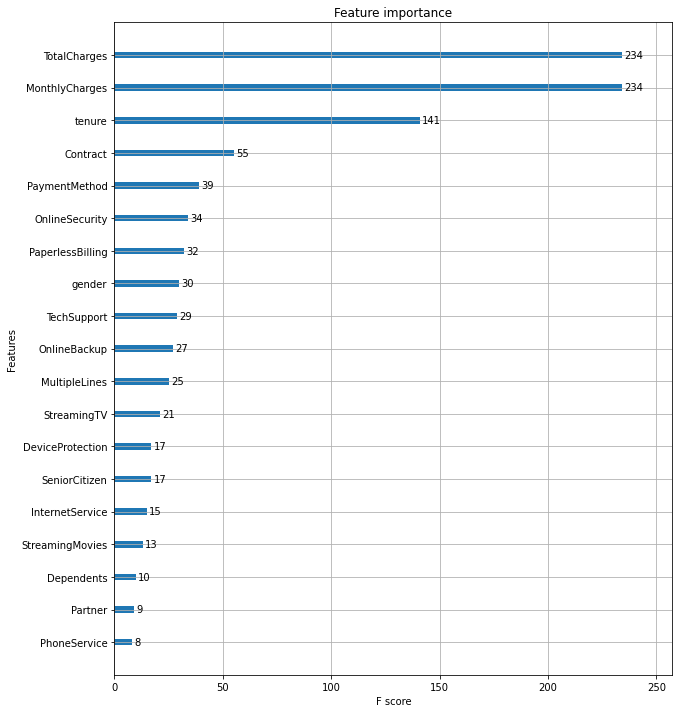

In [134]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_clf1,ax=ax)